遗留问题：

理解analytical solution的过程

优化analytical solution

测试不同delta x

# ACSE-2 Assignment 1

A porous bed of activated carbon is used to remove impurities from water. We can assume that Darcy’s law holds for the flow of liquid within the block, which means that it can be solved as a potential flow problem.
We will assume that there is no flow out of the front or back of the bed, resulting in a 2-dimensional flow pattern, with the bed being 1 m long in this direction. The bed is 2 m wide and 1 m deep. Liquid is forced into the bottom of the bed at a flowrate of 120 l/min. We can assume that the vertical flux is constant over the bottom of the bed. The flow then splits evenly out of the 2 sides of the bed. You can assume that on the open sides the liquid flows out of the entire height of bed and that the horizontal flux is constant over these boundaries.
You should use a stream function formulation to solve this problem



## Question a
Calculate the values of the stream function along all the boundaries of the system.

## Solution for Question a :
![title](./picture.jpeg)
$$ 
Q = 120 l/min = 0.002 m^3/s \\
F_y = 0.002/(1m*2m) = 0.001 m/s \qquad \ F_x = 0.002 / 2 / (1m * 1m) = 0.001 m/s \\
F_x = \frac{\partial \psi}{\partial y} \qquad F_y=-\frac{\partial \psi}{\partial x}\\
$$

top boundary$\implies\psi_{t}$, bottom boundary$\implies\psi_{b}$, 
left boundary$\implies\psi_{l}$, right boundary$\implies\psi_{r}$

$$
F_y = -\frac{\psi_{t}}{\partial x} = 0 \implies \psi_{t} = A\\
F_y = -\frac{\psi_{b}}{\partial x} = 0.001 \implies \psi_{b} = -0.001x + B\\
F_x = \frac{\psi_{l}}{\partial y} = -0.001 \implies \psi_{l} = -0.001y + C\\
F_x = \frac{\psi_{r}}{\partial y} = 0.001 \implies \psi_{r} = 0.001y + D\\
$$

Set $\psi \$ at point(2,0) is 0.

$$
\psi_{b} = -0.001*2+B = 0 \implies B = 0.002\implies\psi_{b} = -0.001x + 0.002\\
$$

Thus, $\psi$ at point(0,0) is 0.002.

$$
\psi_{l} = -0.001*0+C = 0.002 \implies C = 0.002\implies\psi_{l} = -0.001y + 0.002\\
$$

Thus, $\psi$ at point(0,1) is 0.001.

$$
\psi_{t} = A = 0.001 \implies A = 0.001\implies \psi_{t} = 0.001\\
$$

Thus, $\psi$ at point(2,1) is 0.001.

$$
\psi_{r} = 0.001*1 + D = 0.001 \implies D = 0\implies\psi_{r} = 0.001y\\
$$

In conclusion,
$$
\psi_{l} = -0.001y + 0.002 \qquad \psi_{t} = 0.001 \\
\psi_{r} = 0.001y \qquad \psi_{b} = -0.001x + 0.002 \\
$$

In [8]:
#import all packages and set parameters of the model
import numpy as np
import matplotlib.pyplot as plt
import time

#define and set parameters as global variables
dx = 0.01
dy = 0.01
width = 2
height = 1
x_grid = int(width / dx) + 1
y_grid = int(height / dy) + 1

coeff = np.array([[-0.001, 0.002],  # bottom
             [0.0, 0.001],  # top
             [-0.001, 0.002],  # left
             [0.001, 0.0]])  # right

abcdef = [1,1,1,1,-4,0]

In [9]:
def Psi_boundry():
    Psi = np.zeros([x_grid, y_grid], dtype = float)

    x = np.arange(x_grid) * dx
    y = np.arange(y_grid) * dy
    Psi[:,0] = coeff[0][0] * x + coeff[0][1]
    Psi[:, -1] = coeff[1][0] * x + coeff[1][1]
    Psi[0, :] = coeff[2][0] * y + coeff[2][1]
    Psi[-1, :] = coeff[3][0] * y + coeff[3][1]

    return Psi

Psi = Psi_boundry()

## Question b
Use Simultaneous Over Relaxation (SOR) to solve for the values of the stream function within the block. Use ∆𝑥 = ∆𝑦 = 0.01 𝑚. Plot the resultant values of the stream function.Note that this program will be very similar to the one that you wrote for the class worksheet.

### Solution for Question b :

The residual at ponit i,j is:
$$
\xi_{i,j} = au_{i+1,j} + bu_{i-1,j} + cu_{i,j+1} + du_{i,j-1} + eu_{i,j} - f_{i,j} \\
\Delta x = \Delta y = 0.01 \implies a = b = c = d = 1, e = -4, f = 0 \\
\xi_{i,j} = u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j} - f_{i,j}
$$
…with iterations continuing until the average magnitude of the residual drops below a certain value
$$
\frac{\sum\sum|\xi_{i,j}|}{i_{max}j_{max}}\leq\xi_{critical}\\
$$
Always let the simulation run for a few 100 iterations even if the average residual is small. This is because changes in the dependent variable will propagate inwards from the boundaries. 

We can use this approximation to update our estimates:
$$
u^{new}_{i,j}= u^{old}_{i,j} - \omega\frac{\xi_{i,j}}{e_{i,j}}\\
$$

numerical solution process
when w = 1.5
iteration times =  13716
residual =  9.994368447321162e-12

-----------------------------


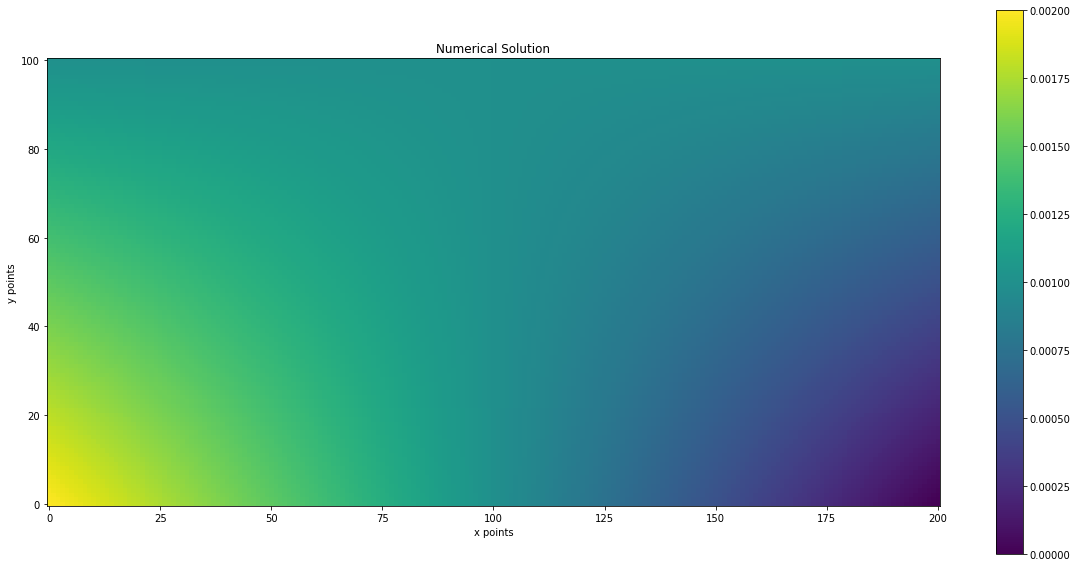

In [10]:
def numerical_solution_Psi():
    iteration = 0
        
    #copy Psi to another array to prevent changes in the original Psi array
    copy_Psi = Psi.copy()
    while (iteration < 101 or compared_residual > tolerance):
        
        if iteration % 2 == 0:
            # matrix from point (1,1)
            residual1 = a * copy_Psi[2::2, 1:-1:2] + b * copy_Psi[:-2:2, 1:-1:2] + c * copy_Psi[1:-1:2, 2::2] + d * copy_Psi[1:-1:2,:-2:2] + e * copy_Psi[1:-1:2,1:-1:2] - f
            # matrix from point (2,2)
            residual2 = a * copy_Psi[3::2, 2:-1:2] + b * copy_Psi[1:-2:2, 2:-1:2] + c * copy_Psi[2:-1:2, 3::2] + d * copy_Psi[2:-1:2,1:-2:2] + e * copy_Psi[2:-1:2,2:-1:2] - f

            copy_Psi[1:-1:2, 1:-1:2] -= omega * residual1 / e
            copy_Psi[2:-1:2, 2:-1:2] -= omega * residual2 / e

        else:
            # matrix from point（1，2）
            residual1 = a * copy_Psi[2::2, 2:-1:2] + b * copy_Psi[:-2:2, 2:-1:2] + c * copy_Psi[1:-1:2, 3::2] + d * copy_Psi[1:-1:2,1:-2:2] + e * copy_Psi[1:-1:2,2:-1:2] - f
            # matrix from point（2，1)
            residual2 = a * copy_Psi[3::2, 1:-1:2] + b * copy_Psi[1:-2:2, 1:-1:2] + c * copy_Psi[2:-1:2, 2::2] + d * copy_Psi[2:-1:2,:-2:2] + e * copy_Psi[2:-1:2,1:-1:2] - f

            copy_Psi[1:-1:2, 2:-1:2] -= omega * residual1 / e
            copy_Psi[2:-1:2, 1:-1:2] -= omega * residual2 / e

        total_residual = abs(residual1).sum() + abs(residual2).sum()
        count = residual1.size + residual2.size
        compared_residual = total_residual / count
        iteration += 1
    
    print('numerical solution process')
    print('when w = %.1f' % omega)
    print('iteration times = ', iteration)
    print('residual = ', compared_residual)
    print('\n-----------------------------')
    numerical_Psi = copy_Psi

    return numerical_Psi, iteration, compared_residual

def plot_numerical_Psi(numerical_Psi):
    plt.figure(figsize=(20,10))
    plt.imshow(numerical_Psi.transpose(),origin='lower')
    plt.title('Numerical Solution')
    plt.xlabel('x points')
    plt.ylabel('y points')
    plt.colorbar()

a = 1
b = 1
c = 1
d = 1
e = -4
f = 0
tolerance = 10**(-11)
omega = 1.5
numerical_Psi, iteration, residual = numerical_solution_Psi()
plot_numerical_Psi(numerical_Psi)

## Question c
Use the calculated stream function values to obtain the values of the liquid flux at all points within the bed. Use the following approximations (and the equivalent ones in the y direction) as appropriate:

Central Difference
Forward Difference
Backward Difference




Use the quiver() function to plot the results.

### Solution for Question c :



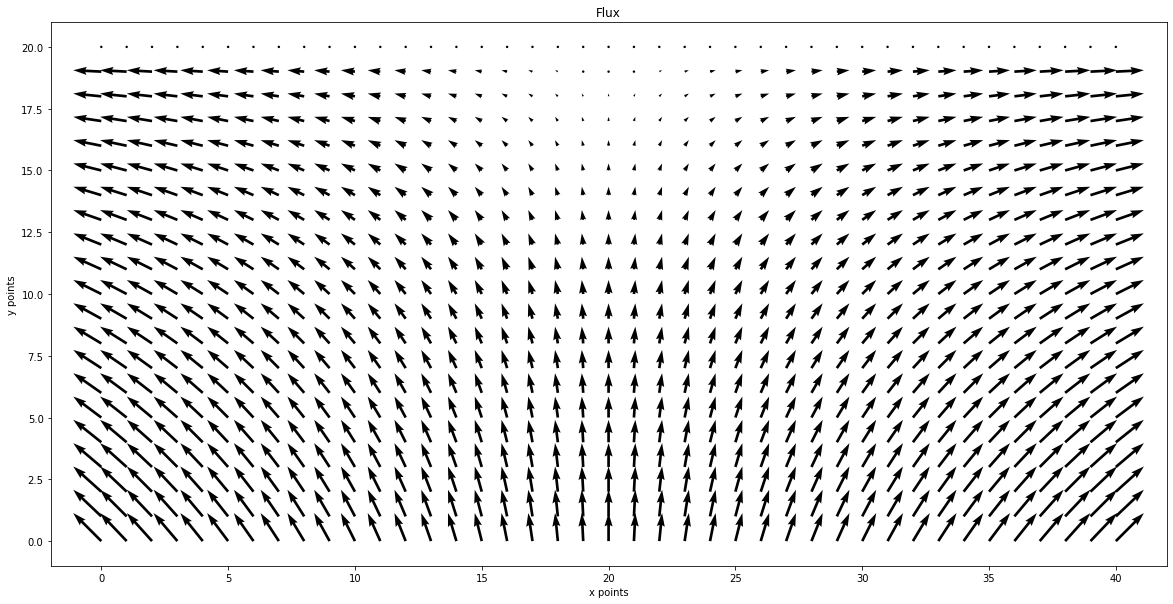

In [11]:
def quiver_plot(step, Psi):
    
    vx=np.zeros([x_grid,y_grid])
    vy=np.zeros([x_grid,y_grid])

    vy[1:-1,:] = -(Psi[2:,:] - Psi[:-2,:]) / (2.0*dx)
    vy[0,:] = -(Psi[1,:] - Psi[0,:]) / dx
    vy[-1,:] = -(Psi[-1:,:] - Psi[-2,:]) / dx

    vx[:,1:-1] = (Psi[:,2:] - Psi[:,:-2]) / (2.0*dy)
    vx[:,0] = (Psi[:,1] - Psi[:,0]) / dy
    vx[:,-1] = (Psi[:,-1] - Psi[:,-2]) / d

    #as for the y axis is defined from bottom to top which is oppsite to the intuition (depth)
    #so applying flipud to opposite it
    vx = np.flipud(np.rot90(vx))
    vy = np.flipud(np.rot90(vy))

    plt.figure(figsize=(20,10))
    plt.quiver(vx[::step,::step],vy[::step,::step])
    plt.title('Flux')
    plt.xlabel('x points')
    plt.ylabel('y points')

step = 5
quiver_plot(step, numerical_Psi)

## Question d
Derive the analytical solution to this problem in the form of an infinite series. Write a program to calculate this series out to an appropriate number of iterations. Compare the analytical solution to the numerical solution from part b). How does the discrepancy between the results change as the ∆𝑥 in part b is changed (still assuming that ∆𝑥 = ∆𝑦). Note that this is thus a convergence analysis. (40 marks)

### Solution for Question d :


Apply analytical solutions to Laplace's Equation:
$$
\psi = (\gamma cosh(\lambda x) + \delta sinh(\lambda x))(\alpha cos(\lambda y)+\beta sin(\lambda y))
$$
In this system, threr are four boundaries, including top, bottom, left and right boundaries. Because we can sum solutions, we can find a solution that satisfies one of the boundaries, while having all the other boundaries zero.

$\psi_{1}$will be the solution where $\psi_{L}$ is a function of position along the left hand boundary, while $\psi_{R}$ = $\psi_{T}$ = $\psi_{B}$ = 0

Since $\psi_{L}$ has a value:
$$
\psi_1(0, y) = \psi_L = \gamma(\alpha cos(\lambda y)+\beta sin(\lambda y)) \\
$$
...this implies that $\gamma$ is non-zero for arbitrary values of $\psi_{L}$

The bottom boundary is assumed zero:
$$
\psi_1(x, 0) = \psi_B = 0 = \alpha(\gamma cosh(\lambda x)+\delta sinh(\lambda x)) \implies \alpha = 0 \\
$$

The top boundary is assumed zero:
$$
\psi_1(x, H) = \psi_T = 0 = (\gamma cosh(\lambda x)+\delta sinh(\lambda x)) \beta sin(\lambda H) \implies \lambda = \frac{n\pi}{H} \\
$$

The right boundary is assumed zero:
$$
\psi_1(W, y) = \psi_R = 0 = \beta sin(\frac{n\pi}{H}y)(\gamma cosh(\frac{n\pi}{H}W)+\delta sinh(\frac{n\pi}{H}W)) \implies \delta = -\gamma coth(\frac{n\pi}{H}W) \\
$$


Going back to the left boundary and substituting for what we know:
$$
\psi_1(0, y) = \psi_L = \gamma(\alpha cos(\lambda y)+\beta sin(\lambda y)) = \gamma \beta sin(\frac{n\pi}{H}y)
$$
Using Fourier Series, we can obtain
$$
\psi_1(0, y) = \psi_L  = \sum_{n=1}^\infty{\gamma_{n} sin(\frac{n\pi}{H}y)} \qquad n=1,2,3,...\\
\gamma_{n} = \frac{2}{H} \int_0^H{\psi_L sin(\frac{n\pi}{H}y)dy} \qquad n=1,2,3,... \\
$$

Substituting everything together:
$$
\begin{align}
\psi_1(x,y) =& (\gamma cosh(\lambda x) + \delta sinh(\lambda x))(\alpha cos(\lambda y)+\beta sin(\lambda y)) \\
=& (\gamma cosh(\lambda x) + \delta sinh(\lambda x))\beta sin(\lambda y) \\
=& (\gamma cosh(\frac{n\pi}{H} x) - \gamma coth(\frac{n\pi}{H}W)sin(\frac{n\pi}{H}x))\beta sin(\frac{n\pi}{H} y) \\
=& \gamma\beta sin(\frac{n\pi}{H} y)(cosh(\frac{n\pi}{H} x) - coth(\frac{n\pi}{H}W)sin(\frac{n\pi}{H}x))\\
=& \sum_{n=1}^\infty{\gamma_{n} sin(\frac{n\pi}{H}y)}(cosh(\frac{n\pi}{H} x) - coth(\frac{n\pi}{H}W)sin(\frac{n\pi}{H}x))\\
\end{align}
$$

$$
\gamma_{n} = \frac{2}{H} \int_0^H{\psi_L sin(\frac{n\pi}{H}y)dy} \qquad n=1,2,3,...\\
\psi_L = my+c
$$

$$
\begin{align}
\gamma_{n} =& \frac{2}{H} \int_0^H{(my+c)sin(\frac{n\pi}{H}y)dy}\\
=& \frac{2(n\pi cos(n\pi)(-c-Hm) + cn\pi + mHsin(n\pi))}{\pi^2n^2} \\
=& \frac{2(n\pi cos(n\pi)(-c-Hm) + cn\pi)}{\pi^2n^2} \\
=& \frac{2(cos(n\pi)(-c-Hm) + c)}{n\pi} \\
\end{align}
$$

This is for one boundary only. You need to do a similar thing for each of the other boundaries and sum the solutions.
Either follow this method for each boundary or, more easily, transform the coordinates to get the equations for the other boundarie:

$$
\begin{align}
x_T = H - y,\ y_T = x \\
x_R = W - x,\ y_R = y \\
x_B = y,\ y_B = x
\end{align}
$$

In [12]:
def Psi_analytical_solution(n_max):
    
    gamma_n = np.zeros((4, n_max))
    n_list = np.linspace(1, n_max, n_max)
    length = (height, width, width, height)

    for i in range(4):
        gamma_n[i, :] = 2 * (np.cos(np.pi * n_list) * (-(coeff[i,1] + length[i] * coeff[i,0])) + coeff[i,1]) / (np.pi * n_list)

    Psi_analytical = np.zeros((x_grid, y_grid))

    for i in range(x_grid):
        for j in range(y_grid):
            for n in range(1, n_max):
                x = i * dx
                y = j * dy
                Psi_analytical[i, j] += gamma_n[0, n - 1] * np.sin(n * np.pi * y / height)\
                                        * (np.cosh(n * np.pi * x / height)\
                                           - np.sinh(n * np.pi * x / height) / np.tanh(n * np.pi * width / height))
                
                Psi_analytical[i, j] += gamma_n[1, n - 1] * np.sin(n * np.pi * x / width)\
                                        * (np.cosh(n * np.pi * (height - y) / width)\
                                           - np.sinh(n * np.pi * (height - y) / width) / np.tanh(n * np.pi * height / width))
                
                Psi_analytical[i, j] += gamma_n[2, n - 1] * np.sin(n * np.pi * x / width)\
                                        * (np.cosh(n * np.pi * y / width)\
                                           - np.sinh(n * np.pi * y / width) / np.tanh(n * np.pi * height / width))
                
                Psi_analytical[i, j] += gamma_n[3, n - 1] * np.sin(n * np.pi * y / height)\
                                        * (np.cosh(n * np.pi * (width - x) / height)\
                                           - np.sinh(n * np.pi * (width - x) / height) / np.tanh(n * np.pi * width / height))
    print('analytical solution process\n')
    print('-----------------------\n')
    
    return Psi_analytical

analytical solution process

-----------------------



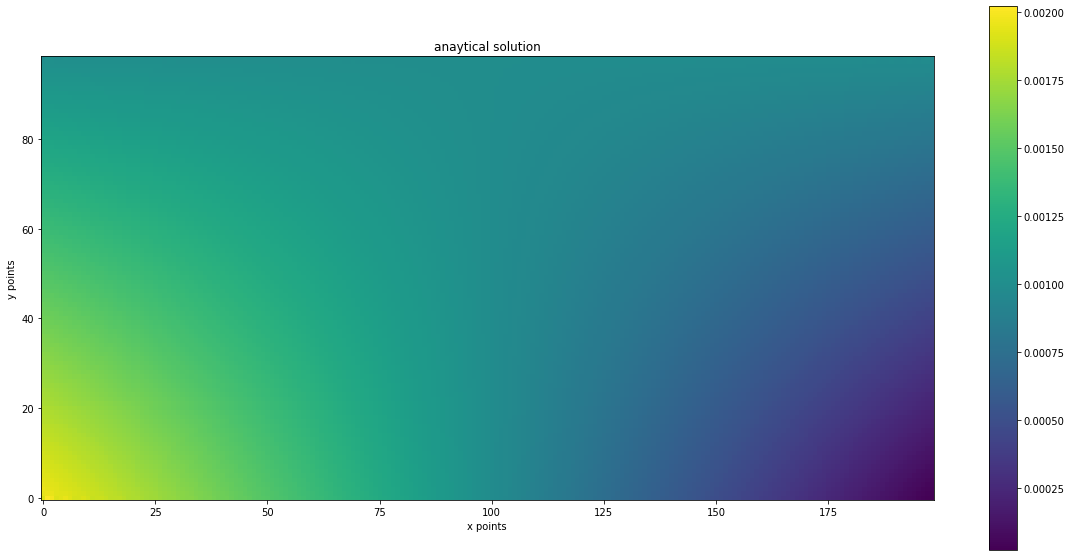

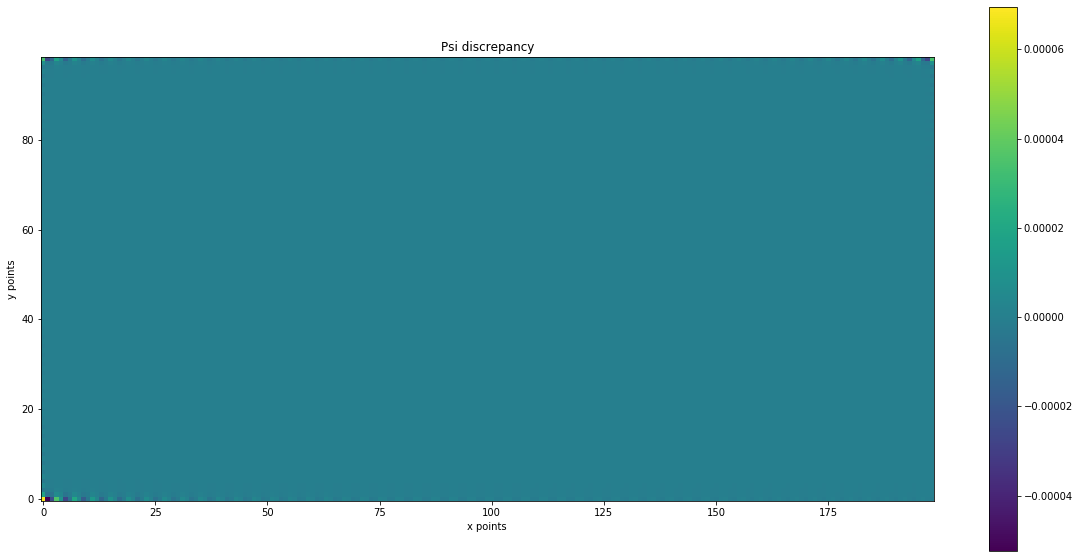

In [13]:
#set the times for Fourier for calculation
n_max = 100
#compute and plot analytical solution for Psi
Psi_analytical = Psi_analytical_solution(n_max)

ax1 = plt.figure(figsize=(20,10))
plt.imshow(Psi_analytical[1:-1,1:-1].transpose(), origin='lower')
plt.title('anaytical solution')
plt.xlabel('x points')
plt.ylabel('y points')
plt.colorbar()

#compute and plot discrepancy of Numerical solution and analytical solution for Psi
Psi_discrepancy = numerical_Psi - Psi_analytical

ax2 = plt.figure(figsize=(20,10))
plt.title('Psi discrepancy')
plt.xlabel('x points')
plt.ylabel('y points')
plt.imshow(Psi_discrepancy[1:-1,1:-1].T, origin="lower")
plt.colorbar()

test and analyse different oemga (w) and appyling iteration times and residual as ouput to compare

numerical solution process
when w = 0.1
iteration times =  700415
residual =  9.999680402471401e-12

-----------------------------
numerical solution process
when w = 0.2
iteration times =  333353
residual =  9.999749508598598e-12

-----------------------------
numerical solution process
when w = 0.3
iteration times =  210939
residual =  9.999664585219416e-12

-----------------------------
numerical solution process
when w = 0.4
iteration times =  149685
residual =  9.998866683300556e-12

-----------------------------
numerical solution process
when w = 0.5
iteration times =  112891
residual =  9.998833725239807e-12

-----------------------------
numerical solution process
when w = 0.6
iteration times =  88325
residual =  9.999340718752776e-12

-----------------------------
numerical solution process
when w = 0.7
iteration times =  70745
residual =  9.999141817871803e-12

-----------------------------
numerical solution process
when w = 0.8
iteration times =  57529
residual =  9.997991

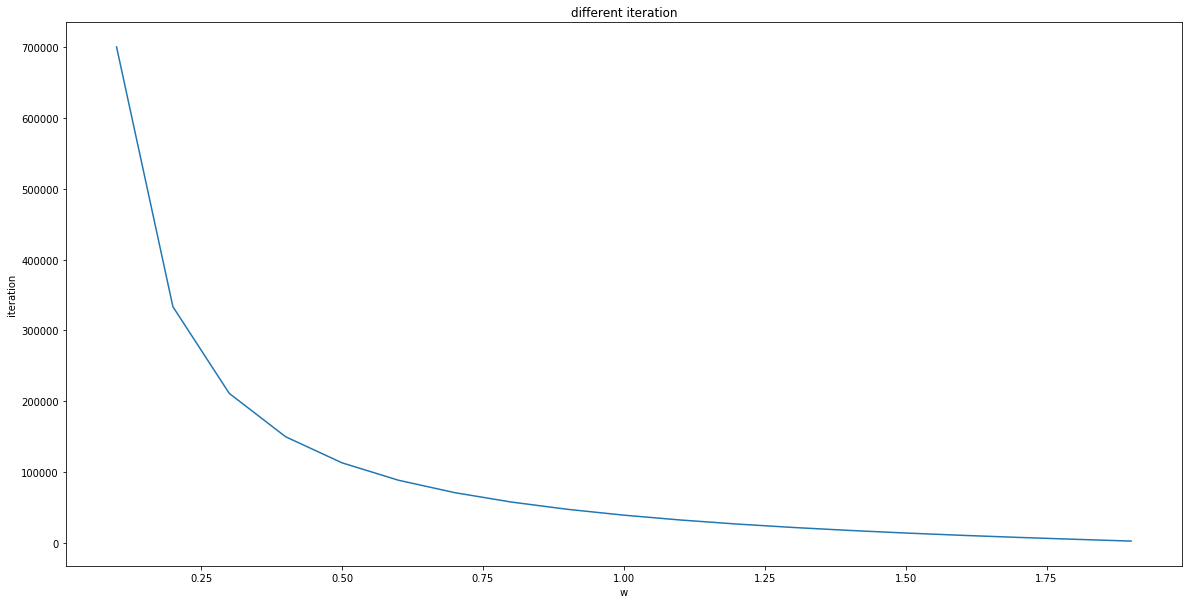

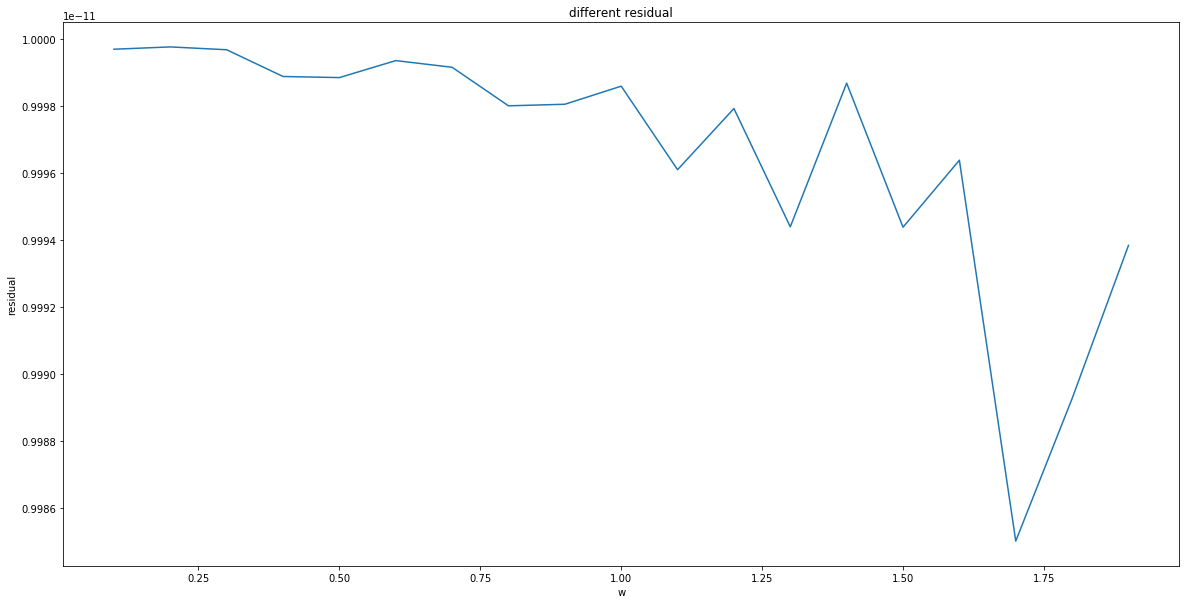

In [14]:
iteration = []
residual = []
for i in range(1,20):
    omega = i/10
    A, B, C = numerical_solution_Psi()
    iteration.append(B)
    residual.append(C)

def plot_different_iteration_and_residual(iteration, residual):
    x = np.arange(1,20)/10
    ax1 = plt.figure(figsize=(20,10))
    plt.plot(x, iteration)
    plt.title('different iteration')
    plt.xlabel('w')
    plt.ylabel('iteration')
    ax2 = plt.figure(figsize=(20,10))
    plt.plot(x, residual)
    plt.title('different residual')
    plt.xlabel('w')
    plt.ylabel('residual')

plot_different_iteration_and_residual(iteration, residual)

from the picture different iteration times for different omega (w), as the w increase, the iteration times present polynominal downtrend.
and when w is lager than 1.0, the iteration times change slowly, so they are nearly identical

from the picture different residual for different omega (w), as the w increase, the redisual is nearly identical (the difference is not lager than 1%).

from my point of view, the best choice for w is value larger than 1.0.

analyse different dx and dy by comparing different discrepancy between numerical solution of Psi with analytical solution of Psi

In [15]:
#firstly test dx from 0.05 to 0.01
dx_list = np.flipud(np.arange(5,11))*1e-3
dy_list = dx_list

x_grid_list = (width / dx_list).astype(int) + 1
y_grid_list = (height / dy_list).astype(int) + 1

omega = 1.4

numerical_solution_list = []
analytical_solution_list = []
for i in range(dx_list.size):
    dx = dx_list[i]
    dy = dy_list[i]
    print('when dx=dy= %.3f' % dx)
    x_grid = x_grid_list[i]
    y_grid = y_grid_list[i]
    Psi = Psi_boundry()
    A,_,_ = numerical_solution_Psi()
    B = Psi_analytical_solution(n_max)
    numerical_solution_list.append(A)
    analytical_solution_list.append(B)



when dx=dy= 0.010
numerical solution process
when w = 1.4
iteration times =  17389
residual =  9.998669074459272e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.009
numerical solution process
when w = 1.4
iteration times =  21069
residual =  9.996445850500819e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.008
numerical solution process
when w = 1.4
iteration times =  26202
residual =  9.996547044185763e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.007
numerical solution process
when w = 1.4
iteration times =  33143
residual =  9.998616764632871e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.006
numerical solution process
when w = 1.4
iteration times =  44083
residual =  9.999187535680601e-12

-----------------------------
analytical solution process

---------------

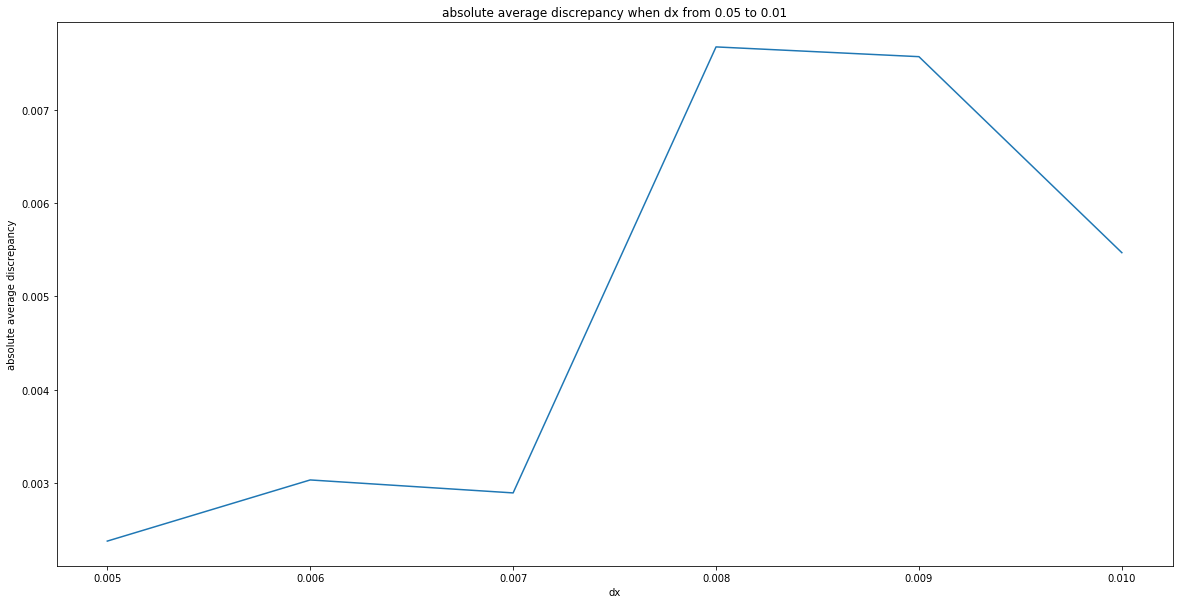

In [16]:
numerical_arr = np.array(numerical_solution_list)
analytical_arr = np.array(analytical_solution_list)
discrepancy_arr = (np.abs(numerical_arr - analytical_arr))/numerical_arr.size
num_discrepancy = []
for i in range(discrepancy_arr.size):
    num_discrepancy.append(np.sum(discrepancy_arr[i]))

x = (np.arange(discrepancy_arr.size)+5)*1e-3
plt.figure(figsize=(20,10))
plt.title('absolute average discrepancy when dx from 0.05 to 0.01')
plt.xlabel('dx')
plt.ylabel('absolute average discrepancy')
plt.plot(x, num_discrepancy)

In [17]:
#then test dx from 0.01 to 0.1
dx_list = np.flipud(np.arange(10,110, 10))*1e-3
dy_list = dx_list

x_grid_list = (width / dx_list).astype(int) + 1
y_grid_list = (height / dy_list).astype(int) + 1

omega = 1.9

numerical_solution_list = []
analytical_solution_list = []
for i in range(dx_list.size):
    dx = dx_list[i]
    dy = dy_list[i]
    print('when dx=dy= %.3f' % dx)
    x_grid = x_grid_list[i]
    y_grid = y_grid_list[i]
    Psi = Psi_boundry()
    A,_,_ = numerical_solution_Psi()
    B = Psi_analytical_solution(n_max)
    numerical_solution_list.append(A)
    analytical_solution_list.append(B)

when dx=dy= 0.100
numerical solution process
when w = 1.9
iteration times =  350
residual =  9.53542814305783e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.090
numerical solution process
when w = 1.9
iteration times =  345
residual =  9.113272944236403e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.080
numerical solution process
when w = 1.9
iteration times =  348
residual =  9.613681909352599e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.070
numerical solution process
when w = 1.9
iteration times =  349
residual =  9.101662410747619e-12

-----------------------------
analytical solution process

-----------------------

when dx=dy= 0.060
numerical solution process
when w = 1.9
iteration times =  346
residual =  9.671428716387924e-12

-----------------------------
analytical solution process

-----------------------

w

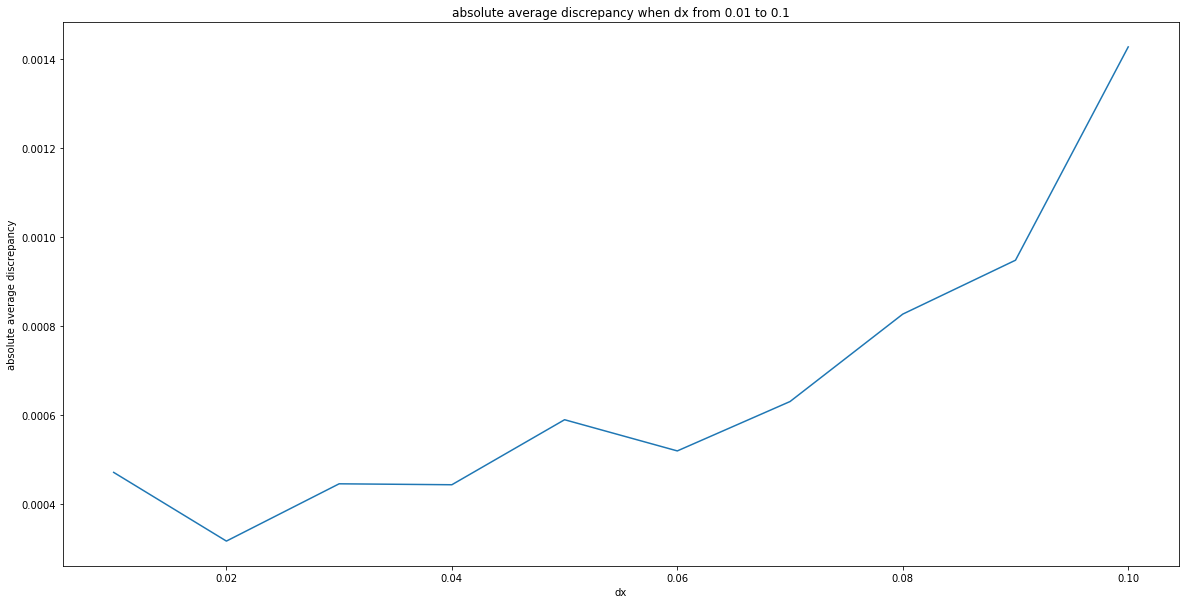

In [18]:
numerical_arr = np.array(numerical_solution_list)
analytical_arr = np.array(analytical_solution_list)
discrepancy_arr = (np.abs(numerical_arr - analytical_arr))/numerical_arr.size
num_discrepancy = []
for i in range(discrepancy_arr.size):
    num_discrepancy.append(np.sum(discrepancy_arr[i]))

x = (np.arange(discrepancy_arr.size)+1)*1e-2
plt.figure(figsize=(20,10))
plt.title('absolute average discrepancy when dx from 0.01 to 0.1')
plt.xlabel('dx')
plt.ylabel('absolute average discrepancy')
plt.plot(x, num_discrepancy)

from the two picture, it indicates that when dx is smaller than 0.01, the discrepancy present no trend
and the discrepancy is about 10 times larger than that when dx is larger than 0.01, which means it cannot converge.

when dx is larger than 0.01, the discrepancy increase as the dx increase.